# Fraud detection bank dataset
#### Stefane Adna dos Santos

## Limpeza dos dados

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report,cohen_kappa_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('fraud_detection_bank_dataset.csv')
df

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,0,9,1354,0,18,0,1,7,9,0,...,0,0,0,1,1,0,0,0,49,1
1,1,0,239,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,55,1
2,2,0,260,0,4,0,3,6,0,0,...,0,0,0,1,1,0,0,0,56,1
3,3,17,682,0,1,0,0,8,17,0,...,0,1,0,1,1,0,0,0,65,1
4,4,1,540,0,2,0,1,7,1,0,...,0,0,0,1,1,0,0,0,175,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20463,20463,0,88,0,0,0,2,-1,0,0,...,0,1,0,0,0,0,1,0,85,0
20464,20464,0,134,0,2,0,0,6,0,0,...,0,0,0,0,0,0,0,0,7,0
20465,20465,4,393,1,1,0,0,-1,4,0,...,0,1,0,0,0,0,0,0,45,0
20466,20466,0,10,0,1,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,5,0


#### Informação sobre o dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20468 entries, 0 to 20467
Columns: 114 entries, Unnamed: 0 to targets
dtypes: float64(1), int64(113)
memory usage: 17.8 MB


#### Verifica a existencia de valores nulos

In [4]:
print(list(df.isnull().sum()))
#não existem valores nulos

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


#### Verifica a existencia de valores duplicados

In [5]:
df.duplicated().sum()
#não existem valores duplicados

0

#### Descrição dos dados do dataset

In [6]:
#para visualizar todas as colunas
pd.set_option('display.max_columns', 500)

In [7]:
df.describe()

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,col_71,col_72,col_73,col_74,col_75,col_76,col_77,col_78,col_79,col_80,col_81,col_82,col_83,col_84,col_85,col_86,col_87,col_88,col_89,col_90,col_91,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99,col_100,col_101,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
count,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.0,20468.0,20468.0,20468.0,20468.0,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.0,20468.0,20468.0,20468.0,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.0,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.0,20468.0,20468.0,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,2.046800e+04,20468.000000,20468.000000,20468.0,20468.0,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000
mean,10233.500000,3.226256,294.793043,0.420021,2.329343,0.083594,0.939857,2.386066,3.226256,0.0,0.0,0.0,0.0,0.0,0.038646,0.363152,0.330760,0.412644,196.679500,0.0,0.0,0.0,0.0,4.220344,34.201290,3.068790,2.701925,0.875562,0.038597,0.999951,1.409078,6.184043,0.226646,0.422806,0.066641,2.483926,0.0,17.981776,2.323871,167.509380,0.002052,0.043531,0.608315,5.638509,0.297538,0.719660,0.082861,0.038548,21.388753,2.733975,23.753225,25.238421,0.0,0.0,0.0,193.039037,11.102697,0.551104,17.597665,0.004983,0.215751,4.311560,0.253176,0.569035,19.624927,1.605873,13.726353,5.758257,3.680821e+04,36.608951,2.752052,0.0,0.0,0.005570,0.028728,0.034053,0.008257,0.094733,0.015830,0.000440,0.002785,0.006156,0.006645,0.034884,0.101133,0.022230,0.030291,0.030389,0.021302,0.005619,0.070403,0.082617,0.000391,0.030242,0.002883,0.010748,0.011872,0.211061,0.135871,0.235490,0.147205,0.045828,0.007964,0.365595,0.004935,0.358120,0.002443,0.308384,0.190737,0.000049,0.049345,0.024282,43.486125,0.265683
std,5908.746991,20.564308,717.541984,7.367275,10.068512,0.840537,4.222896,3.018140,20.564308,0.0,0.0,0.0,0.0,0.0,0.192754,0.480920,0.470498,0.492322,6700.095223,0.0,0.0,0.0,0.0,29.063427,126.109375,12.768477,14.340519,4.880614,0.315826,0.006990,2.959671,22.127733,1.686032,5.838401,0.287787,18.287974,0.0,675.933608,47.751341,785.655354,0.089491,5.113268,4.202274,58.081800,3.618908,18.694113,1.787475,0.800296,673.155287,40.189125,345.441008,2037.403967,0.0,0.0,0.0,1078.106022,518.206806,19.703362,1413.812136,0.712956,2.163711,54.264324,3.096011,18.075807,1095.454480,28.589283,250.784650,133.300795,3.750082e+05,86.601625,2.645600,0.0,0.0,0.074424,0.167044,0.181370,0.090493,0.292853,0.124819,0.020965,0.052699,0.078220,0.081245,0.183490,0.301513,0.147434,0.171392,0.171659,0.144391,0.074748,0.

#### Apaga as colunas com apenas valores iguais a zero

In [8]:
df = df.drop(df.columns[df.apply(lambda col: col.mean()==0)],axis=1)
df

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_13,col_14,col_15,col_16,col_17,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_72,col_73,col_74,col_75,col_76,col_77,col_78,col_79,col_80,col_81,col_82,col_83,col_84,col_85,col_86,col_87,col_88,col_89,col_90,col_91,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99,col_100,col_101,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,0,9,1354,0,18,0,1,7,9,0,1,0,1,0,9,74,19,25,0,0,1,3,24,0,0,0,2,97,0,981,0,0,20,89,1,1,0,0,36,35,358,15,1182,56,0,11,0,16,82,1,1,32,31,189,32,17043.084656,189,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,4,0,0,0,1,1,0,0,0,49,1
1,1,0,239,0,1,0,1,0,0,0,0,0,1,0,0,7,1,0,0,0,1,1,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,0,0,14,0,32,0,0,0,0,0,0,0,0,0,0,0,0,1156.720000,25,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,55,1
2,2,0,260,0,4,0,3,6,0,0,1,1,0,0,0,13,7,5,0,0,1,5,0,0,0,0,0,5,0,91,0,0,6,0,0,0,0,0,13,8,45,0,168,0,0,0,0,0,0,0,0,0,0,0,0,245.365854,41,7,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,56,1
3,3,17,682,0,1,0,0,8,17,0,0,0,1,0,23,52,1,7,0,0,1,1,1,9,0,0,0,3,0,26,0,0,0,2,0,0,0,0,0,0,4,2,33,0,0,0,0,0,2,0,0,0,0,2,0,46088.184211,38,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0,0,65,1
4,4,1,540,0,2,0,1,7,1,0,1,0,1,0,1,20,3,11,0,0,1,4,20,0,0,0,0,52,0,669,0,0,0,9,0,0,0,0,21,6,66,36,670,39,0,36,0,0,8,0,0,20,4,48,34,26070.232932,249,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,175,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20463,20463,0,88,0,0,0,2,-1,0,0,0,0,0,0,0,5,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,85,0
20464,20464,0,134,0,2,0,0,6,0,0,0,0,0,40035,0,2,2,0,0,0,1,0,3,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,7,0,10,0,0,0,0,0,0,0,0,0,0,0,0,1337.600000,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,7,0
20465,20465,4,393,1,1,0,0,-1,4,0,0,0,1,0,4,62,1,1,13,0,1,2,0,0,1,0,0,0,0,4,0,0,0,0,0,0,3,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,1163.329545,88,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,45,0
20466,20466,0,10,0,1,0,0,-1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,0


In [9]:
df.describe()

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_13,col_14,col_15,col_16,col_17,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_72,col_73,col_74,col_75,col_76,col_77,col_78,col_79,col_80,col_81,col_82,col_83,col_84,col_85,col_86,col_87,col_88,col_89,col_90,col_91,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99,col_100,col_101,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
count,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,2.046800e+04,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000
mean,10233.500000,3.226256,294.793043,0.420021,2.329343,0.083594,0.939857,2.386066,3.226256,0.038646,0.363152,0.330760,0.412644,196.679500,4.220344,34.201290,3.068790,2.701925,0.875562,0.038597,0.999951,1.409078,6.184043,0.226646,0.422806,0.066641,2.483926,17.981776,2.323871,167.509380,0.002052,0.043531,0.608315,5.638509,0.297538,0.719660,0.082861,0.038548,21.388753,2.733975,23.753225,25.238421,193.039037,11.102697,0.551104,17.597665,0.004983,0.215751,4.311560,0.253176,0.569035,19.624927,1.605873,13.726353,5.758257,3.680821e+04,36.608951,2.752052,0.005570,0.028728,0.034053,0.008257,0.094733,0.015830,0.000440,0.002785,0.006156,0.006645,0.034884,0.101133,0.022230,0.030291,0.030389,0.021302,0.005619,0.070403,0.082617,0.000391,0.030242,0.002883,0.010748,0.011872,0.211061,0.135871,0.235490,0.147205,0.045828,0.007964,0.365595,0.004935,0.358120,0.002443,0.308384,0.190737,0.000049,0.049345,0.024282,43.486125,0.265683
std,5908.746991,20.564308,717.541984,7.367275,10.068512,0.840537,4.222896,3.018140,20.564308,0.192754,0.480920,0.470498,0.492322,6700.095223,29.063427,126.109375,12.768477,14.340519,4.880614,0.315826,0.006990,2.959671,22.127733,1.686032,5.838401,0.287787,18.287974,675.933608,47.751341,785.655354,0.089491,5.113268,4.202274,58.081800,3.618908,18.694113,1.787475,0.800296,673.155287,40.189125,345.441008,2037.403967,1078.106022,518.206806,19.703362,1413.812136,0.712956,2.163711,54.264324,3.096011,18.075807,1095.454480,28.589283,250.784650,133.300795,3.750082e+05,86.601625,2.645600,0.074424,0.167044,0.181370,0.090493,0.292853,0.124819,0.020965,0.052699,0.078220,0.081245,0.183490,0.301513,0.147434,0.171392,0.171659,0.144391,0.074748,0.255831,0.275309,0.019767,0.171258,0.053613,0.103119,0.108314,0.408072,0.342660,0.424315,0.354319,0.209116,0.088885,0.558812,0.073478,0.479459,0.049366,0.461837,0.392892,0.006990,0.216593,0.305079,59.217560,0.441707
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

#### Apaga a coluna unnamed:0

In [10]:
df = df.drop(columns=['Unnamed: 0'])
df

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_13,col_14,col_15,col_16,col_17,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_72,col_73,col_74,col_75,col_76,col_77,col_78,col_79,col_80,col_81,col_82,col_83,col_84,col_85,col_86,col_87,col_88,col_89,col_90,col_91,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99,col_100,col_101,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,9,1354,0,18,0,1,7,9,0,1,0,1,0,9,74,19,25,0,0,1,3,24,0,0,0,2,97,0,981,0,0,20,89,1,1,0,0,36,35,358,15,1182,56,0,11,0,16,82,1,1,32,31,189,32,17043.084656,189,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,4,0,0,0,1,1,0,0,0,49,1
1,0,239,0,1,0,1,0,0,0,0,0,1,0,0,7,1,0,0,0,1,1,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,0,0,14,0,32,0,0,0,0,0,0,0,0,0,0,0,0,1156.720000,25,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,55,1
2,0,260,0,4,0,3,6,0,0,1,1,0,0,0,13,7,5,0,0,1,5,0,0,0,0,0,5,0,91,0,0,6,0,0,0,0,0,13,8,45,0,168,0,0,0,0,0,0,0,0,0,0,0,0,245.365854,41,7,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,56,1
3,17,682,0,1,0,0,8,17,0,0,0,1,0,23,52,1,7,0,0,1,1,1,9,0,0,0,3,0,26,0,0,0,2,0,0,0,0,0,0,4,2,33,0,0,0,0,0,2,0,0,0,0,2,0,46088.184211,38,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0,0,65,1
4,1,540,0,2,0,1,7,1,0,1,0,1,0,1,20,3,11,0,0,1,4,20,0,0,0,0,52,0,669,0,0,0,9,0,0,0,0,21,6,66,36,670,39,0,36,0,0,8,0,0,20,4,48,34,26070.232932,249,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,175,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20463,0,88,0,0,0,2,-1,0,0,0,0,0,0,0,5,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,85,0
20464,0,134,0,2,0,0,6,0,0,0,0,0,40035,0,2,2,0,0,0,1,0,3,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,7,0,10,0,0,0,0,0,0,0,0,0,0,0,0,1337.600000,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,7,0
20465,4,393,1,1,0,0,-1,4,0,0,0,1,0,4,62,1,1,13,0,1,2,0,0,1,0,0,0,0,4,0,0,0,0,0,0,3,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,1163.329545,88,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,45,0
20466,0,10,0,1,0,0,-1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,0


## Classificação

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.linear_model import Perceptron
from sklearn import preprocessing

#### Separandos os dados e seus rótulos

In [12]:
X = df.drop(columns=['targets'])
Y = df['targets']

#### Separando dos dados em treino e teste

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

#### Kfold com split

Kfold e floresta randomica variando o valor do estimator

In [14]:
def k_fold_rf(X,Y):
    kf = KFold(n_splits=10)
    kf.get_n_splits(X)
    estimator = list(range(100,1100,100))
    n=0
    for train_index, test_index in kf.split(X):
        classifier =  RandomForestClassifier(n_estimators=estimator[n], n_jobs=-1,random_state=42)
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        min_max_scaler = preprocessing.MinMaxScaler()

        X_train_min_max = min_max_scaler.fit_transform(X_train)
        X_test_min_max = min_max_scaler.transform(X_test)

        classifier.fit(X_train_min_max,y_train)
        y_pred = classifier.predict(X_test_min_max)

        print("k-fold: "+str(n)+", Estimator: "+str(estimator[n]))
        n += 1
        print(accuracy_score(y_test,y_pred))


In [15]:
print(k_fold_rf(x_train,y_train))

k-fold: 0, Estimator: 100
0.9334554334554335
k-fold: 1, Estimator: 200
0.931013431013431
k-fold: 2, Estimator: 300
0.9358974358974359
k-fold: 3, Estimator: 400
0.9401709401709402
k-fold: 4, Estimator: 500
0.93341478313989
k-fold: 5, Estimator: 600
0.9346365302382407
k-fold: 6, Estimator: 700
0.9187538179596824
k-fold: 7, Estimator: 800
0.9279169211973122
k-fold: 8, Estimator: 900
0.916310323762981
k-fold: 9, Estimator: 1000
0.9321930360415394
None


Melhor valor foi o k=4 com estimator de 400

Kfold and KNN variando o valor dos neightbors

In [20]:
def k_fold_n(X,Y):
    kf = KFold(n_splits=10)
    kf.get_n_splits(X)
    neighboard = list(range(5,110,10))
    n=0
    for train_index, test_index in kf.split(X):
        classifier =  KNeighborsClassifier(n_neighbors=neighboard[n],weights='distance')
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        min_max_scaler = preprocessing.MinMaxScaler()

        X_train_min_max = min_max_scaler.fit_transform(X_train)
        X_test_min_max = min_max_scaler.transform(X_test)

        classifier.fit(X_train_min_max,y_train)
        y_pred = classifier.predict(X_test_min_max)

        print("k-fold: "+str(n)+", Neightboard: "+str(neighboard[n]))
        n += 1
        print(accuracy_score(y_test,y_pred))

In [21]:
print(k_fold_n(x_train,y_train))

k-fold: 0, Neightboard: 5
0.9017094017094017
k-fold: 1, Neightboard: 15
0.9035409035409036
k-fold: 2, Neightboard: 25
0.9017094017094017
k-fold: 3, Neightboard: 35
0.9035409035409036
k-fold: 4, Neightboard: 45
0.8937080024434942
k-fold: 5, Neightboard: 55
0.8930971288943189
k-fold: 6, Neightboard: 65
0.8796579108124618
k-fold: 7, Neightboard: 75
0.8973732437385461
k-fold: 8, Neightboard: 85
0.8753817959682346
k-fold: 9, Neightboard: 95
0.8918753817959683
None


Melhor valor foi o de k=1 com neightboard de 15

#### Score
Essa função exibe as metricas de avaliação do modelo. Como o score, recall, f1 score, precisão e kappa. Além disso, ela também exibe a matriz de confusão. 


In [22]:
def score(y_test,y_pred):
    y_score = accuracy_score(y_test,y_pred)
    y_recall = recall_score(y_test,y_pred)
    y_f1_score = f1_score(y_test,y_pred)
    y_precision = precision_score(y_test,y_pred)
    y_kappa = cohen_kappa_score(y_test,y_pred)
    print('Acuracia: ' + str(y_score))
    print('Recall: ' + str(y_recall))
    print('F1 Score: '+ str(y_f1_score))
    print('Precisão: ' + str(y_precision))
    print('Kappa: ' + str(y_kappa))
    
    print('\n')
    
    print('Classification Report')
    print(classification_report(y_test,y_pred,target_names=['neg','pos']))
    
    matrix = metrics.confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,5))
    sns.heatmap(matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    all_sample_title = 'Accuracy Score: {0}'.format(y_score)
    plt.title(all_sample_title, size = 15)

Min and Max scaler

In [23]:
min_max_scaler = preprocessing.MinMaxScaler()
x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.transform(x_test)

#### KNN

O KNN realiza a classificação avaliando as caracteristicas dos K vizinhos mais próximos. 


Acuracia: 0.894723986321446
Recall: 0.7123287671232876
F1 Score: 0.7835258663987946
Precisão: 0.8705357142857143
Kappa: 0.7148911747683034


Classification Report
              precision    recall  f1-score   support

         neg       0.90      0.96      0.93      2999
         pos       0.87      0.71      0.78      1095

    accuracy                           0.89      4094
   macro avg       0.89      0.84      0.86      4094
weighted avg       0.89      0.89      0.89      4094



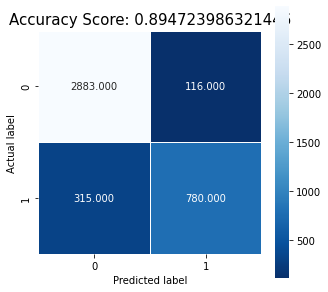

In [24]:
#Instanciando o modelo
knn = KNeighborsClassifier(n_neighbors=15,weights='distance')
#Treinando o modelo
model_knn = knn.fit(x_train,y_train)
#realizando a predição
pred_knn = model_knn.predict(x_test)
score(y_test,pred_knn)

#### Floresta Aleatória

Acuracia: 0.9269662921348315
Recall: 0.8164383561643835
F1 Score: 0.8567321514135122
Precisão: 0.9012096774193549
Kappa: 0.8078838639244986


Classification Report
              precision    recall  f1-score   support

         neg       0.94      0.97      0.95      2999
         pos       0.90      0.82      0.86      1095

    accuracy                           0.93      4094
   macro avg       0.92      0.89      0.90      4094
weighted avg       0.93      0.93      0.93      4094



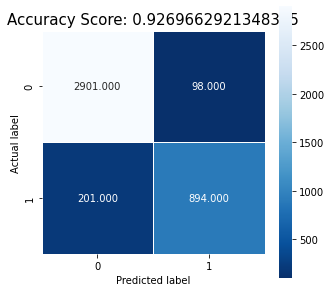

In [33]:
random_forest = RandomForestClassifier(n_estimators=400,n_jobs=-1,random_state=42)
model_rf = random_forest.fit(x_train, y_train)
pred_rf = model_rf.predict(x_test)
score(y_test,pred_rf)

#### Perceptron
Perceptron é uma rede neural de camada única e um Perceptron de várias camadas é chamado de Rede Neural Artificial. O Perceptron é um classificador linear (binário). Além disso, é usado na aprendizagem supervisionada e pode ser usado para classificar os dados de entrada fornecidos.

Acuracia: 0.8566194430874451
Recall: 0.5442922374429223
F1 Score: 0.6700393479482855
Precisão: 0.8713450292397661
Kappa: 0.5846037157150596


Classification Report
              precision    recall  f1-score   support

         neg       0.85      0.97      0.91      2999
         pos       0.87      0.54      0.67      1095

    accuracy                           0.86      4094
   macro avg       0.86      0.76      0.79      4094
weighted avg       0.86      0.86      0.84      4094



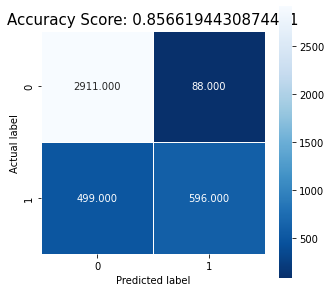

In [26]:
ptn = Perceptron(max_iter=100)                    
model_ptn = ptn.fit(x_train, y_train)                
pred_ptn = model_ptn.predict(x_test)
score(y_test,pred_ptn)

#### Bagging
Realiza a votação de um conjunto de previsores mas cada previsor é composto do mesmo modelo de classificação. Os dados de treinamento são divididos em conjuntos aleatorios para cada previsor.

Acuracia: 0.9274548119198828
Recall: 0.806392694063927
F1 Score: 0.8560349006301503
Precisão: 0.9121900826446281
Kappa: 0.8077904496394406


Classification Report
              precision    recall  f1-score   support

         neg       0.93      0.97      0.95      2999
         pos       0.91      0.81      0.86      1095

    accuracy                           0.93      4094
   macro avg       0.92      0.89      0.90      4094
weighted avg       0.93      0.93      0.93      4094



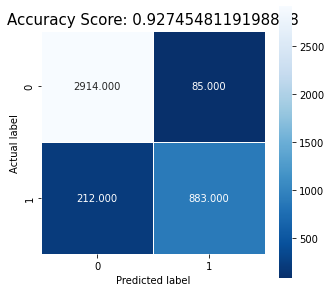

In [34]:
rf_clf = RandomForestClassifier(n_estimators=400,n_jobs=-1,random_state=42)
bag_clf = BaggingClassifier(rf_clf)
bag_clf.fit(x_train, y_train)
pred_bag = bag_clf.predict(x_test)
score(y_test,pred_bag)

#### KFold

##### K = 10 com a floresta aleatória

In [28]:
kfold = KFold(n_splits=10, shuffle=True,random_state=2)
random_forest = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1,random_state=42)
result = cross_val_score(random_forest ,X,Y, cv = kfold)
result

array([0.91450904, 0.8988764 , 0.89985344, 0.89692233, 0.901319  ,
       0.89692233, 0.88910601, 0.88812897, 0.9115347 , 0.90469208])

Analisando qual o tamanho do K ideal

In [29]:
def get_kfold(x,y,k,model):
    kfold = KFold(n_splits=k, shuffle=True,random_state=2)
    result = cross_val_score(model,x , y, cv = kfold)    
    return result.mean()

Text(0, 0.5, 'Score')

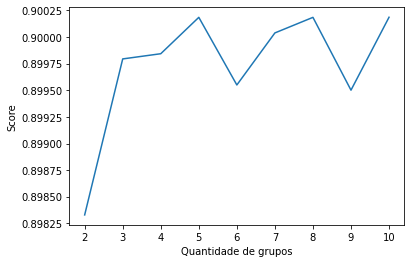

In [30]:
kfold = [get_kfold(X, Y, i, random_forest) for i in range(2,11,1)]

plt.plot(list(range(2,11,1)), kfold)
plt.xlabel("Quantidade de grupos")
plt.ylabel("Score")
#
#Os k 5,8 e 10 obtiveram os mesmos resultados, logo usar o k=5 é melhor,
#pois além de ter o mesmo resultado que o 10, ele será mais rapido de processar.

Com isso, fica claro que o melhor modelo testado foi o de bagging utilizando a floreta aleatória. Ele obteve os seguintes resultados:

    > Acuracia: 0.9274548119198828
    > Recall: 0.806392694063927
    > F1 Score: 0.8560349006301503
    > Precisão: 0.9121900826446281
    > Kappa: 0.8077904496394406